In [57]:
# Author: Meduri Venkata Shivaditya

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as tr
from matplotlib.patches import Ellipse
#import os

#try:
 #   import probml_utils as pml
#except ModuleNotFoundError:
 #   %pip install -qq git+https://github.com/probml/probml-utils.git
 #   import probml_utils as pml

## **FUNÇÃO DISPONIBILIZADA PELOS AUTORES**

In [58]:

def make_plot(use_inverse=True):
    base = plt.gca().transData
    rot = tr.Affine2D().rotate_deg(30)
    plot_ellipses(0, 0, 9, 81, 3, c="tab:red", linewidth=3.0, transform=rot + base)
    plt.arrow(
        -1.2,
        0,
        2.4,
        0,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="blue",
        transform=rot + base,
    )
    plt.arrow(
        0,
        -0.5,
        0,
        1,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="blue",
        transform=rot + base,
    )
    plt.arrow(
        -1.2,
        0,
        0,
        0.5,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="black",
        transform=rot + base,
    )
    plt.arrow(
        0,
        -0.5,
        1.2,
        0,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="black",
        transform=rot + base,
    )
    plt.arrow(
        -1.2,
        0.5,
        0,
        -0.5,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="black",
        transform=rot + base,
    )
    plt.arrow(
        1.2,
        -0.5,
        -1.2,
        0,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="black",
        transform=rot + base,
    )
    plt.arrow(
        1,
        0.3,
        0,
        0.3,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="black",
        transform=rot + base,
    )
    plt.text(0.658, 1, r"$u_2$", fontsize=14)
    plt.text(1, 0.94, r"$u_1$", fontsize=14)
    if use_inverse:
        plt.text(-1.6, -0.48, r"$λ_2^{-1/2}$", fontsize=14)
        plt.text(0.85, -0.3, r"$λ_1^{-1/2}$", fontsize=14)
        fname = "gaussEvec2"
    else:
        plt.text(-1.6, -0.48, r"$λ_2^{1/2}$", fontsize=14)
        plt.text(0.85, -0.3, r"$λ_1^{1/2}$", fontsize=14)
        fname = "gaussEvec"
    plt.arrow(
        1,
        0.3,
        0.3,
        0,
        length_includes_head=True,
        width=0.015,
        head_width=0.05,
        head_length=0.05,
        color="black",
        transform=rot + base,
    )
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    scale_factor = 1.2
    plt.xlim(xmin * scale_factor, xmax * scale_factor)
    plt.ylim(ymin * scale_factor, ymax * scale_factor)
    plt.tight_layout()

    plt.show()

In [59]:
def range_chebyshev(a, b, steps):
    """
    Create a grid point of N+1 values
    """
    theta_vals = np.arange(steps + 1) * np.pi / steps
    x_vals = (a + b) / 2 + (a - b) / 2 * np.cos(theta_vals)
    return x_vals


def plot_ellipses(x0, y0, a, b, r, lim=5, steps=50000, **kwargs):
    """
    Plot an ellipses of the form
        a(x - x0) ^ 2 + b(y - y0) ^ 2 = r^2
    """
    xrange = range_chebyshev(-lim, lim, steps)
    yrange_up = np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
    yrange_down = -np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
    plt.text(0.02, 0.1, "μ", fontsize=12)
    plt.plot(xrange, yrange_up, **kwargs)
    plt.plot(xrange, yrange_down, **kwargs)

In [60]:
#Vamos criar a seguinte matriz
#Retirado do site do numpy :https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
cov = np.array([[6, -3], [-3, 3.5]])
mean = np.array([-1, 3])

def create_gaussian():
  pts = np.random.multivariate_normal(mean, cov, size=800)
  return pts

def plot_gaussian():
  plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)

  plt.axis('equal')

  plt.grid()

  plt.show()

def get_cov(points):
  return np.cov(points.T)

def get_mean(points):
  return np.mean(points, axis=0)

def get_angle(eigvecs):
  return np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

def get_eig(pts):
  return np.linalg.eigh(get_cov(pts))

def get_width_height(eigvals):
   return 2 * np.sqrt(eigvals)

def plot_gaussian_ellipse(pts):
  eigvals, eigvecs = get_eig(pts)
  width, height = get_width_height(eigvals)
  angle = get_angle(eigvecs)
  print(angle)

  fig, ax = plt.subplots()

  ellipse = Ellipse(xy=get_mean(pts),
                  width=width, height=height,
                  angle=angle, edgecolor='red', fc='None', lw=2)


  ax.add_patch(ellipse)
  ax.scatter(pts[:, 0], pts[:, 1], alpha=0.2)

  origin = get_mean(pts)  # A origem das setas é a média dos dados

# Cada seta é um autovetor multiplicado pela raiz quadrada dos autovalores (variância)
  for i in range(len(eigvals)):
      # Definir a direção e o tamanho das setas (escala pelos autovalores)
      eigval = np.sqrt(eigvals[i])
      eigvec = eigvecs[:, i]

      # Usar quiver para desenhar as setas
      ax.quiver(origin[0], origin[1], eigvec[0]*eigval, eigvec[1]*eigval,
                angles='xy', scale_units='xy', scale=1,
                color='blue', width=0.005, headwidth=3, headlength=5)

      # Desenhar as setas na direção oposta também (visualização simétrica)
      ax.quiver(origin[0], origin[1], -eigvec[0]*eigval, -eigvec[1]*eigval,
                angles='xy', scale_units='xy', scale=1,
                color='blue', width=0.005, headwidth=3, headlength=5)

  # Ajustar os limites do gráfico
  ax.set_xlim(np.min(pts[:, 0]) - 1, np.max(pts[:, 0]) + 1)
  ax.set_ylim(np.min(pts[:, 1]) - 1, np.max(pts[:, 1]) + 1)

  # Mostrar o gráfico
  plt.title('Elipse da Matriz de Distribuição Normal')
  plt.grid(True)
  plt.show()

In [61]:
pts = create_gaussian()

-123.10106475966802


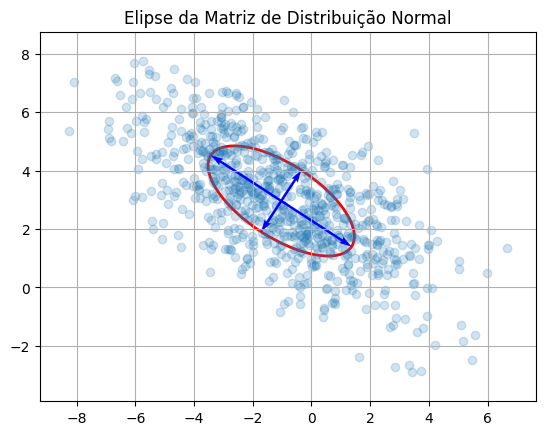

In [72]:
plot_gaussian_ellipse(pts)

Interpretação do gráfico. Aqui queremos ver como os autovalores e autovetores funcionam numa distribuição gaussiana.

Podemos perceber que o maior autovalor tem seu autovetor apontando para o local onde a variância é maior. O segundo autovalor tem seu autovetor apontando para o segundo local de maior variância.

No nosso caso, temos somente dois parâmetros, estamos trabalhando com uma Distribuição Normal Multivariada de duas variáveis aleátorias. Para mais dimensões, o caso continuaria igual.

Referência: https://users.cs.utah.edu/~tch/CS4640F2019/resources/A%20geometric%20interpretation%20of%20the%20covariance%20matrix.pdf

Queremos usar as elipses, pois, se dois pontos estão na mesma elipse, então eles tem a mesma probabilidade de acontecer.
Referência: https://online.stat.psu.edu/stat505/book/export/html/636

<ipython-input-59-a1a26ed6453a>:16: RuntimeWarning: invalid value encountered in sqrt
  yrange_up = np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
<ipython-input-59-a1a26ed6453a>:17: RuntimeWarning: invalid value encountered in sqrt
  yrange_down = -np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0


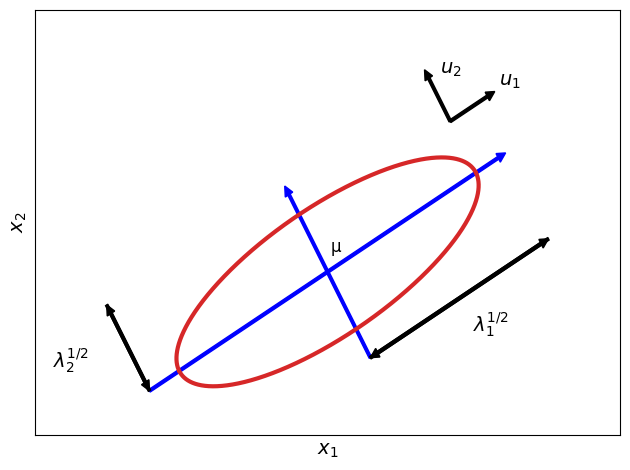

In [63]:
make_plot(use_inverse=False)

<ipython-input-59-a1a26ed6453a>:16: RuntimeWarning: invalid value encountered in sqrt
  yrange_up = np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0
<ipython-input-59-a1a26ed6453a>:17: RuntimeWarning: invalid value encountered in sqrt
  yrange_down = -np.sqrt(b * (r**2 - a * (xrange - x0) ** 2)) / b + y0


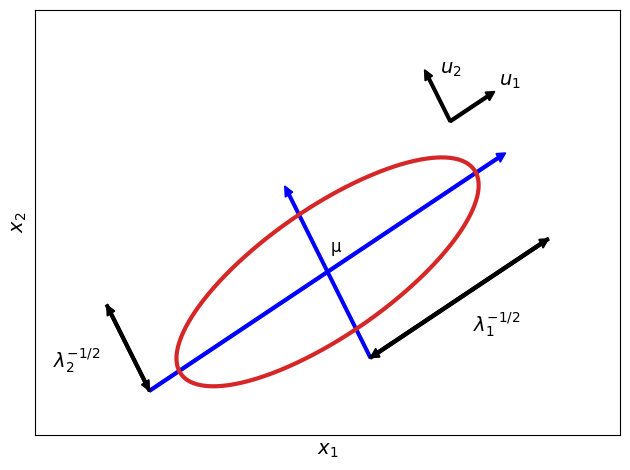

In [64]:
make_plot(use_inverse=True)